In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# and will use scikit-learn & scipy

In [2]:
water = pd.read_csv('water_potability.csv')
water = water.sample(frac=1).reset_index(drop=True)
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.842359,217.324800,29644.813606,4.179108,328.503921,310.771178,14.335395,62.654956,3.865296,1
1,7.709106,178.810828,18610.124152,7.734441,NaN,462.201163,13.888704,64.841637,4.235108,0
2,7.005230,219.921997,26597.586447,7.351021,333.583723,379.598806,13.284691,98.965389,3.589866,0
3,7.386582,191.585565,26351.903774,8.426161,NaN,505.187929,18.925674,72.649614,3.791373,1
4,7.143942,153.236364,11553.039281,8.444687,329.404457,278.483266,11.266886,81.718413,3.792840,0


Handling missing data by simply dropping the samples with any NaN value

In [3]:
water.dropna(axis=0, inplace=True)

Now I will reserve some part of the data as test set to use it in final evaluation 

In [4]:
from sklearn.model_selection import train_test_split
water_data = water.drop('Potability', axis=1)
water_label = water.Potability
X_trainval, X_test, y_trainval, y_test = train_test_split(water_data, water_label, test_size=0.33, random_state=0)
data = pd.concat([X_trainval, y_trainval], axis=1)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
363,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
33,7.494391,205.190707,25058.160217,6.881659,327.949396,313.091520,16.589072,72.976741,3.579652,1
1925,7.071314,213.619625,20038.796417,7.602252,290.057219,605.305041,8.713964,58.413460,4.293727,1
604,7.290089,205.213105,26115.616326,5.137891,357.794088,402.874799,7.960478,63.698514,4.700618,0
2772,8.176080,201.553701,21856.988628,5.241047,320.260120,464.803330,15.627641,61.654744,4.112322,0
...,...,...,...,...,...,...,...,...,...,...
1382,5.564342,256.208830,11245.735767,7.212254,329.338366,369.555513,15.640053,51.150344,2.285988,1
2003,8.390501,215.295518,27032.142262,6.553958,282.859453,443.445590,12.841611,46.368219,4.150359,1
2703,6.898932,209.636422,15422.220893,6.884918,293.562020,396.811214,15.671717,66.597336,3.688456,0
932,8.522568,208.133000,16446.328050,6.729775,372.503843,346.374598,12.002178,80.758618,3.358284,0


<h2>Exploratory Data Analysis</h2>

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,7.094413,196.065257,21797.508189,7.133153,332.914546,427.375551,14.426262,66.393452,3.984729,0.402376
std,1.578048,32.967315,8707.563650,1.556210,40.605872,81.325855,3.344163,16.047457,0.781612,0.490559
min,1.757037,73.492234,1351.906979,1.390871,129.000000,201.619737,4.371899,8.577013,1.450000,0.000000
25%,6.094302,177.194093,15425.335904,6.146027,307.701015,366.524930,12.177346,55.913798,3.465677,0.000000
50%,6.994195,197.357588,20567.145930,7.198432,332.744519,424.257013,14.359365,65.782453,3.987012,0.000000
75%,8.064411,216.506261,27095.082166,8.106435,358.334305,485.181822,16.715681,77.149953,4.527463,1.000000
max,13.349889,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Features are on very different scales

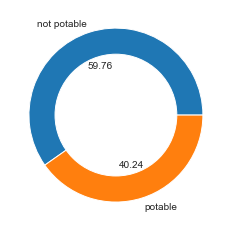

In [6]:
plt.pie(data.Potability.value_counts(), labels=['not potable','potable'], autopct='%.2f')
white_circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(white_circle)

Class distribution is skewed

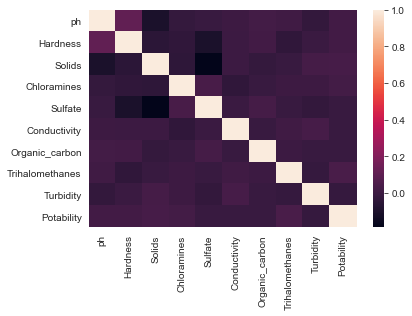

In [7]:
corr = data.corr()
sns.heatmap(corr)

Features have bad linear relationships, meaning that linear models won't help much

Now we will see how features distribute to per class.

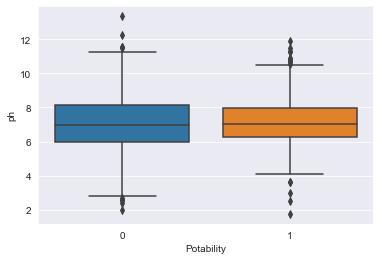

In [8]:
sns.boxplot(data=data, x='Potability', y='ph')

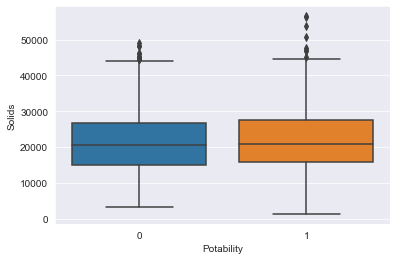

In [9]:
sns.boxplot(data=data, x='Potability', y='Solids')

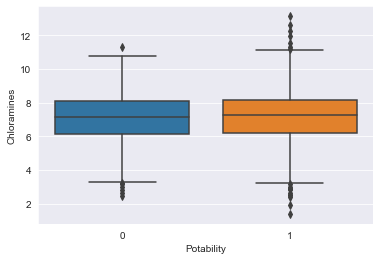

In [10]:
sns.boxplot(data=data, x='Potability', y='Chloramines')

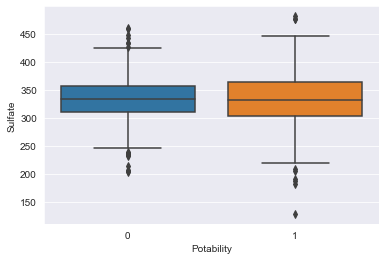

In [11]:
sns.boxplot(data=data, x='Potability', y='Sulfate')

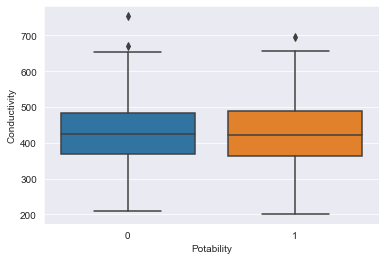

In [12]:
sns.boxplot(data=data, x='Potability', y='Conductivity')

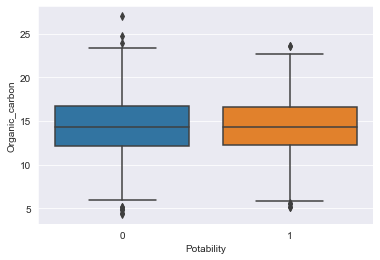

In [13]:
sns.boxplot(data=data, x='Potability', y='Organic_carbon')

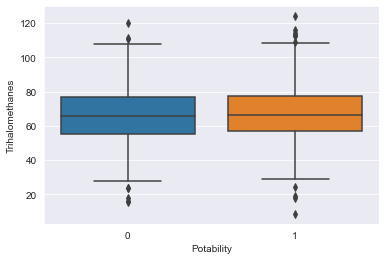

In [14]:
sns.boxplot(data=data, x='Potability', y='Trihalomethanes')

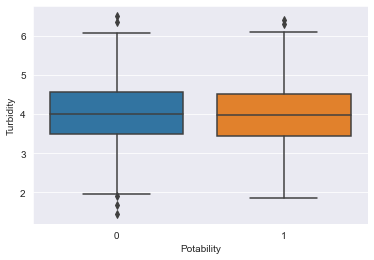

In [15]:
sns.boxplot(data=data, x='Potability', y='Turbidity')

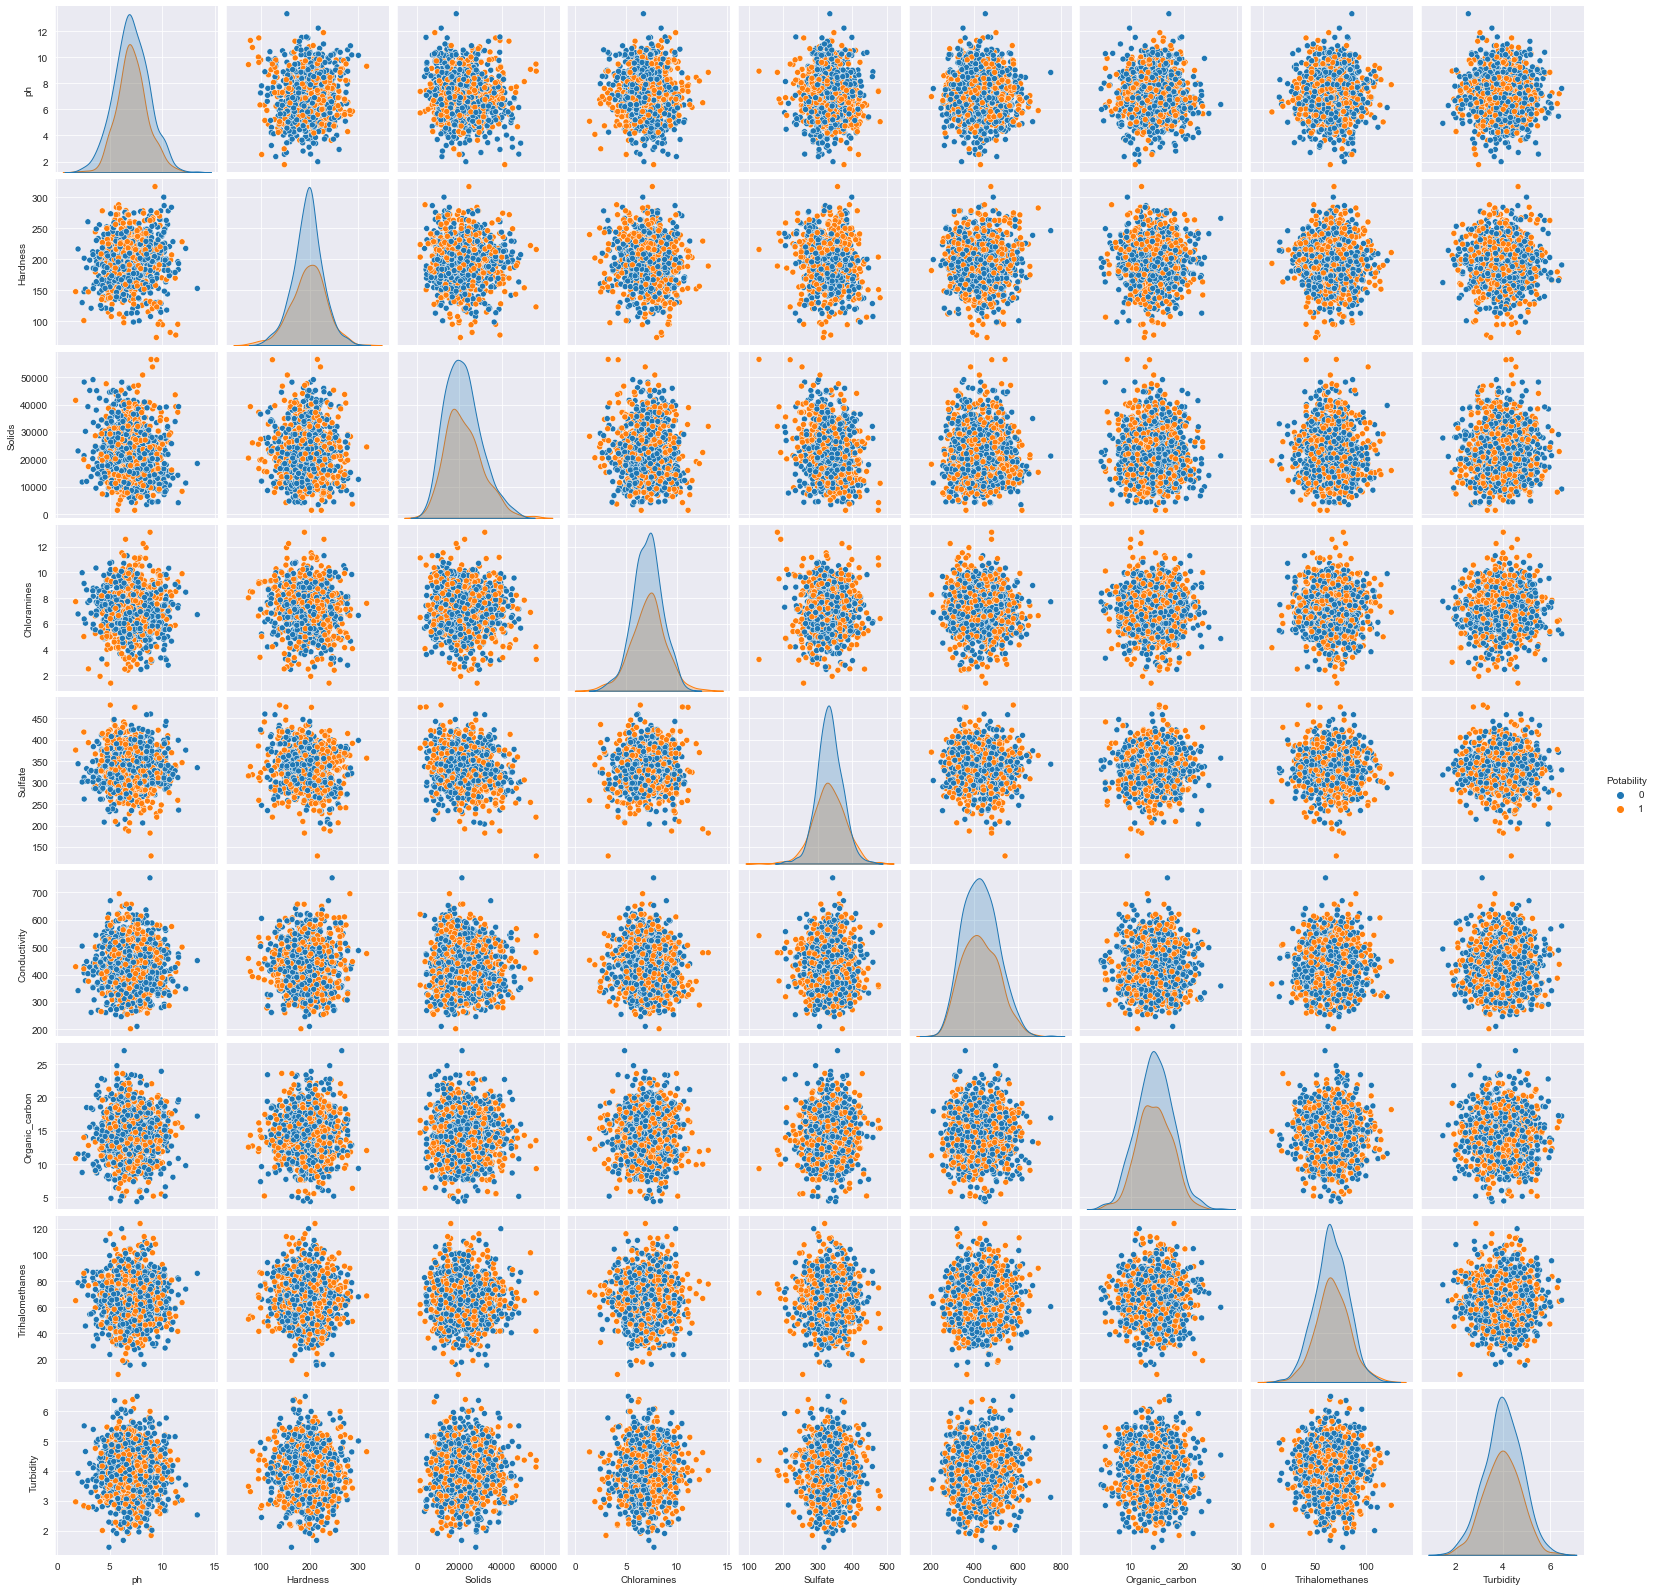

In [16]:
sns.pairplot(data = data, hue='Potability')

Differences in plots at the diagonal indicate these features' help to distinguish between classes

<h2>Feature Engineering</h2>

In [17]:
from scipy.stats import skew
skew(data.drop('Potability', axis=1)), data.columns

(array([ 0.09488034, -0.17554276,  0.59839067, -0.10400169, -0.09999322,
         0.26716374,  0.00741855,  0.0215475 , -0.05630325]),
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
       dtype='object'))

Let's see notable skews. As most models work better with features with normal distribution, we may try to reduce these values

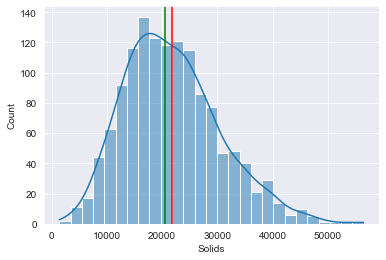

In [18]:
hist_solids = sns.histplot(data=data,x='Solids', kde=True)
hist_solids.axvline(data.Solids.mean(), color='red') # mean
hist_solids.axvline(data.Solids.median(), color='green') # median

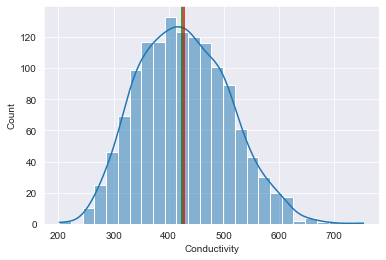

In [19]:
hist_solids = sns.histplot(data=data,x='Conductivity', kde=True)
hist_solids.axvline(data.Conductivity.mean(), color='red') # mean
hist_solids.axvline(data.Conductivity.median(), color='green') # median

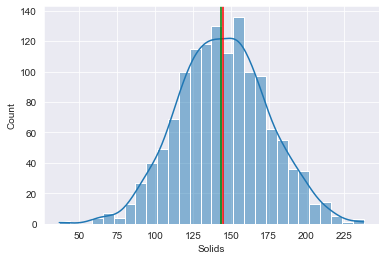

In [20]:
data.Solids = data.Solids**(1/2)
hist_solids = sns.histplot(data=data,x='Solids', kde=True)
hist_solids.axvline(data.Solids.mean(), color='red') # mean
hist_solids.axvline(data.Solids.median(), color='green') # median

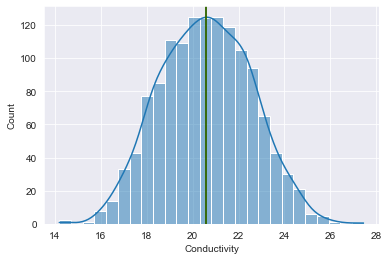

In [21]:
data.Conductivity = data.Conductivity**(1/2)
hist_solids = sns.histplot(data=data,x='Conductivity', kde=True)
hist_solids.axvline(data.Conductivity.mean(), color='red') # mean
hist_solids.axvline(data.Conductivity.median(), color='green') # median

In [22]:
skew(data.drop('Potability', axis=1))

array([ 0.09488034, -0.17554276, -0.00064653, -0.10400169, -0.09999322,
        0.03180534,  0.00741855,  0.0215475 , -0.05630325])

Skewness of Solids and Conductivity reduced

In [23]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,7.094413,196.065257,144.604918,7.133153,332.914546,20.579128,14.426262,66.393452,3.984729,0.402376
std,1.578048,32.967315,29.792362,1.556210,40.605872,1.969248,3.344163,16.047457,0.781612,0.490559
min,1.757037,73.492234,36.768288,1.390871,129.000000,14.199286,4.371899,8.577013,1.450000,0.000000
25%,6.094302,177.194093,124.198775,6.146027,307.701015,19.144841,12.177346,55.913798,3.465677,0.000000
50%,6.994195,197.357588,143.412503,7.198432,332.744519,20.597500,14.359365,65.782453,3.987012,0.000000
75%,8.064411,216.506261,164.605833,8.106435,358.334305,22.026843,16.715681,77.149953,4.527463,1.000000
max,13.349889,317.338124,237.673458,13.127000,481.030642,27.447088,27.006707,124.000000,6.494749,1.000000


Data is still not scaled

<h2>Preprocessing</h2>

Splitting data into training and validation test. Test set we reserved is also in two pieces, X_test and y_test, and we must apply the same operations to X_test before final evaluation. 

In [24]:
X = data.drop('Potability', axis=1).to_numpy()
y = data.Potability.to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
logreg = LogisticRegression().fit(X_train_scaled, y_train)
pred_logreg = logreg.predict(X_val_scaled)
cr_logreg = classification_report(y_val, pred_logreg, target_names=['not-potable','potable'], output_dict=True)
cr_logreg_dataframe = pd.DataFrame(cr_logreg).transpose()
cr_logreg_dataframe

,precision,recall,f1-score,support
not-potable,0.592262,1.000000,0.743925,199.000000
potable,1.000000,0.007246,0.014388,138.000000
accuracy,0.593472,0.593472,0.593472,0.593472
macro avg,0.796131,0.503623,0.379157,337.000000
weighted avg,0.759229,0.593472,0.445183,337.000000


As mentioned, linear model is not good for the data

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)
pred = svc.predict(X_val_scaled)
f1_score(y_val,pred)

0.4723618090452262

In [28]:
svc1 = SVC(C=100,gamma=10)
svc1.fit(X_train_scaled,y_train)
pred1 = svc1.predict(X_val_scaled)
cr = classification_report(y_val,pred1,target_names=['not-potable','potable'], output_dict=True)
cr_dataframe = pd.DataFrame(cr).transpose()
cr_dataframe

,precision,recall,f1-score,support
not-potable,0.673077,0.703518,0.687961,199.000000
potable,0.542636,0.507246,0.524345,138.000000
accuracy,0.623145,0.623145,0.623145,0.623145
macro avg,0.607856,0.605382,0.606153,337.000000
weighted avg,0.619662,0.623145,0.620961,337.000000


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)
cr_rf = classification_report(y_val, pred_rf, target_names = ['not potable','potable'], output_dict = True)
cr_rf_dataframe = pd.DataFrame(cr_rf).transpose()
cr_rf_dataframe

,precision,recall,f1-score,support
not potable,0.678431,0.869347,0.762115,199.000000
potable,0.682927,0.405797,0.509091,138.000000
accuracy,0.679525,0.679525,0.679525,0.679525
macro avg,0.680679,0.637572,0.635603,337.000000
weighted avg,0.680272,0.679525,0.658502,337.000000


I used pre-scaling versions because random forest doesn't need scaling of the data

<h2>Hyper-parameter Tuning</h2>

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid_SVC = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','sigmoid']}
grid_search_SVC = GridSearchCV(SVC(), param_grid_SVC, cv=5)
grid_search_SVC.fit(X_train_scaled, y_train)
optimised_SVC = grid_search_SVC.best_estimator_

Classification report for optimised SVC:

In [31]:
pred_optimised_SVC = optimised_SVC.predict(X_val_scaled)
cr_optimised_SVC = classification_report(y_val, pred_optimised_SVC, target_names = ['not potable','potable'], output_dict = True)
cr_optimised_SVC_dataframe = pd.DataFrame(cr_optimised_SVC).transpose()
cr_optimised_SVC_dataframe

,precision,recall,f1-score,support
not potable,0.639175,0.934673,0.759184,199.000000
potable,0.717391,0.239130,0.358696,138.000000
accuracy,0.649852,0.649852,0.649852,0.649852
macro avg,0.678283,0.586902,0.558940,337.000000
weighted avg,0.671204,0.649852,0.595186,337.000000


In [32]:
param_grid_rf = {
    'max_features': ['auto','sqrt','log2'],
    'n_estimators': [100, 300, 1000]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv = 5)
grid_search_rf.fit(X_train, y_train)
optimised_rf = grid_search_rf.best_estimator_

Classification report for optimised random forest:

In [33]:
pred_optimised_rf = optimised_rf.predict(X_val)
cr_optimised_rf = classification_report(y_val, pred_optimised_rf, target_names = ['not potable','potable'], output_dict = True)
cr_optimised_rf_dataframe = pd.DataFrame(cr_optimised_rf).transpose()
cr_optimised_rf_dataframe

,precision,recall,f1-score,support
not potable,0.680934,0.879397,0.767544,199.00000
potable,0.700000,0.405797,0.513761,138.00000
accuracy,0.685460,0.685460,0.685460,0.68546
macro avg,0.690467,0.642597,0.640653,337.00000
weighted avg,0.688741,0.685460,0.663621,337.00000
